# Self Organizing Map

## Install MiniSom Package

### Importing the libraries


In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [153]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values # X contains all columns besides the last one
y = dataset.iloc[:, -1].values # y contains only the last column

## Feature Scaling


In [154]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

## Training the SOM


In [155]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

## Visualizing the results


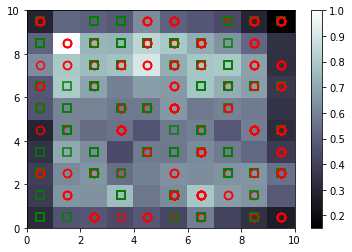

In [156]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
	w = som.winner(x)
	plot(w[0] + 0.5,
		 w[1] + 0.5,
		 markers[y[i]],
		 markeredgecolor=colors[y[i]],
		 markerfacecolor='None',
		 markersize=8,
		 markeredgewidth=1.5)
show()


## Finding the frauds


In [175]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,8)], mappings[(4,7)]), axis=0)
frauds = sc.inverse_transform(frauds)

## Printing the Fraunch Clients

In [176]:
print('Fraud customer ID\'s')
for i in frauds[:, 0]:
	print(int(i))

Fraud customer ID's
15651868
15651460
15672637
15636454
15638983
15654625
15623210
